In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron:
    weights = []
    def __init__(self, indim, bias = 0.0, learn_rate = 0.0001):
        self.weights = np.zeros(indim)
        self.bias = bias
        self.learn_rate = learn_rate
    
    def train(self, inputs, outputs, epsilon = 1.0E-8, max_itr = 1000, print_debug=False):
        sse = float('inf')
        itr = 0
        while sse > epsilon and itr < max_itr:
            # Reset sse to zero
            sse = 0
            for x, y in zip(inputs, outputs):
                if x.shape != self.weights.shape:
                    raise Exception("incompatible input vector shape: " + str(x.shape))
                a = self._activate(x)
                err = y - a
                # Update weights and bias term
                self.weights += self.learn_rate*err*x
                self.bias += self.learn_rate*err
                # Add to sum of squred error
                sse += err**2
                if print_debug:
                    print('y: {}  x: {}  a: {}  weights: {}  err: {}  sse: {}'.format(y,x,a, self.weights, err, sse))
            itr += 1
        if itr < max_itr:
            print('converged in {} iterations'.format(itr))
        else:
            print('failed to converge after {} iterations'.format(itr))
    
    def predict(self, x):
        return self._activate(x) > 0
    
    def _activate(self, x):
        return 1.0 if sum([w*x for (w,x) in zip(self.weights, x)]) + self.bias > 0 else 0.0

In [3]:
def plot_model(perceptron, expected_labels):
    cx = np.arange(0,1.5,0.1)
    cy = np.arange(0,1.5,0.1)
    X,Y = np.meshgrid(cx,cy)
    x = X.flatten()
    y = Y.flatten()
    col = map((lambda i:'red' if perceptron.predict(i) else 'blue'), zip(x,y))
    plt.scatter(x,y,c=col)
    for i in range(expected_labels.shape[0]):
        for ii in range(expected_labels.shape[1]):
            plt.annotate(expected_labels[i][ii], xy=(i,ii), xytext=(20,20), textcoords='offset points',
                         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), zorder=100)
    plt.show()

----- not -----
converged in 3 iterations
[0] -> True
[1] -> False


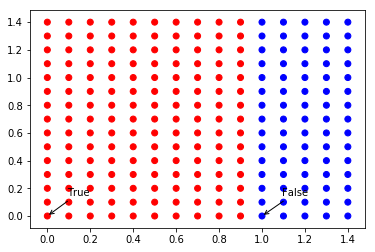

----- and -----
converged in 6 iterations
[0 0] -> False
[0 1] -> False
[1 0] -> False
[1 1] -> True


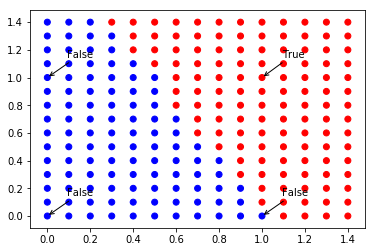

----- or -----
converged in 4 iterations
[0 0] -> False
[0 1] -> True
[1 0] -> True
[1 1] -> True


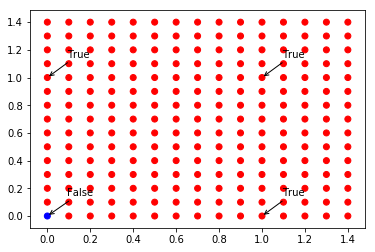

----- nand -----
converged in 4 iterations
[0 0] -> True
[0 1] -> True
[1 0] -> True
[1 1] -> False


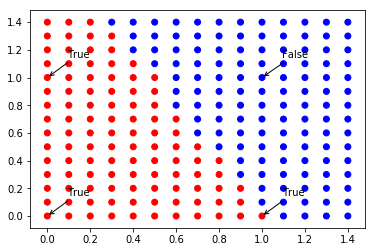

----- xnor -----
failed to converge after 1000 iterations
[0 0] -> False
[0 1] -> False
[1 0] -> True
[1 1] -> True


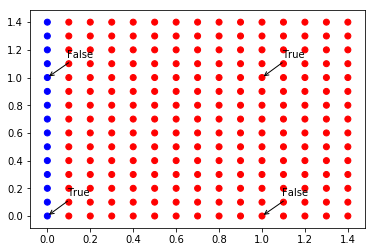

----- xor -----
failed to converge after 1000 iterations
[0 0] -> True
[0 1] -> True
[1 0] -> False
[1 1] -> False


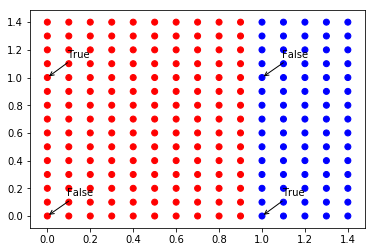

In [4]:
inputs1 = np.array([[0],[1]])
inputs2 = np.array([[0,0],[0,1],[1,0],[1,1]])

not_out  = np.array([[1],[0]])
and_out  = np.array([[0],[0],[0],[1]])
or_out   = np.array([[0],[1],[1],[1]])
nand_out = np.array([[1],[1],[1],[0]])
xnor_out = np.array([[1],[0],[0],[1]])
xor_out   = np.array([[0],[1],[1],[0]])

print('----- not -----')
pnot = Perceptron(1)
pnot.train(inputs1, not_out)
for test in inputs1:
    print('{} -> {}'.format(test, pnot.predict(test)))
plot_model(pnot, np.array([['True'],['False']]))

print('----- and -----')
pand = Perceptron(2)
pand.train(inputs2, and_out)
for test in inputs2:
    print('{} -> {}'.format(test, pand.predict(test)))    
plot_model(pand, np.array([['False','False'],['False','True']]))
    

print('----- or -----')
por = Perceptron(2)
por.train(inputs2, or_out)
for test in inputs2:
    print('{} -> {}'.format(test, por.predict(test)))
plot_model(por, np.array([['False','True'],['True','True']]))

print('----- nand -----')
pnand = Perceptron(2)
pnand.train(inputs2, nand_out)
for test in inputs2:
    print('{} -> {}'.format(test, pnand.predict(test)))
plot_model(pnand, np.array([['True','True'],['True','False']]))

print('----- xnor -----')
pxnor = Perceptron(2)
pxnor.train(inputs2, xnor_out)
for test in inputs2:
    print('{} -> {}'.format(test, pxnor.predict(test)))
plot_model(pxnor, np.array([['True','False'],['False','True']]))

print('----- xor -----')
pxor = Perceptron(2)
pxor.train(inputs2, xor_out)
for test in inputs2:
    print('{} -> {}'.format(test, pxor.predict(test)))
plot_model(pxor, np.array([['False','True'],['True','False']]))